In [1]:
pip install matplotlib scikit-learn graphviz


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [47]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


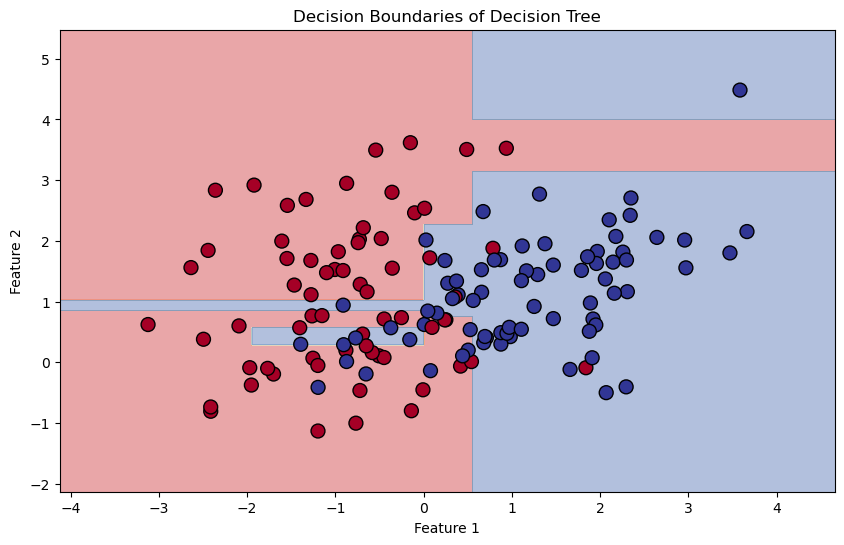

In [49]:
plt.figure(figsize=(10,6))

# Define the mesh grid to plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predicting values for the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu, s=100)

plt.title("Decision Boundaries of Decision Tree")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


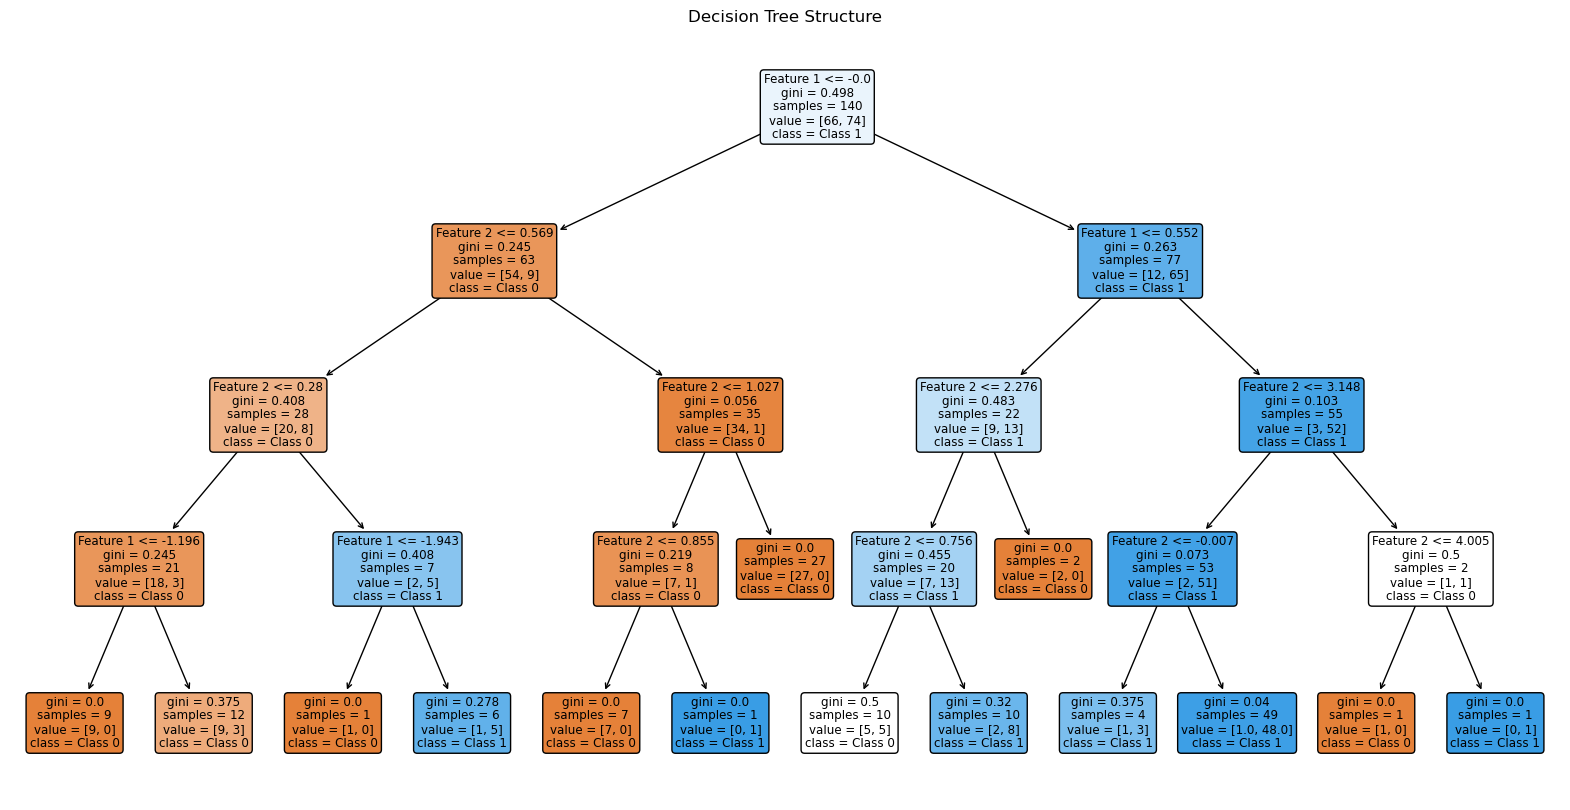

In [51]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'], 
          filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

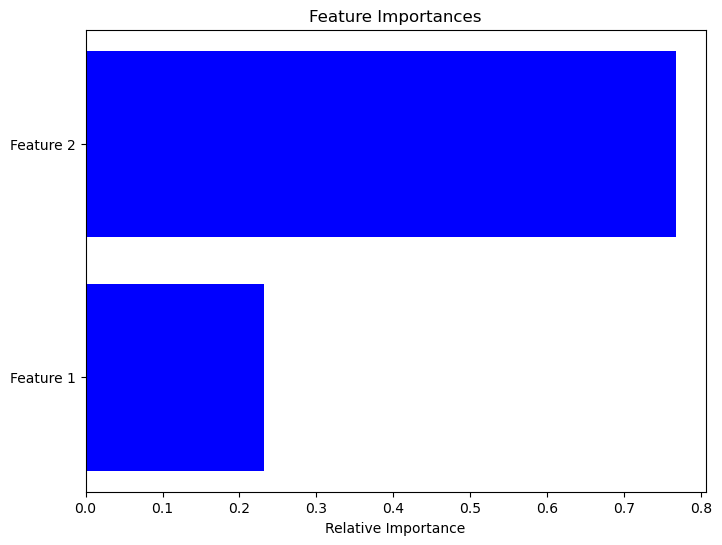

In [53]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), ['Feature 1', 'Feature 2'])
plt.xlabel('Relative Importance')
plt.show()

In [56]:
#Tweaking max_depth hyperparameter

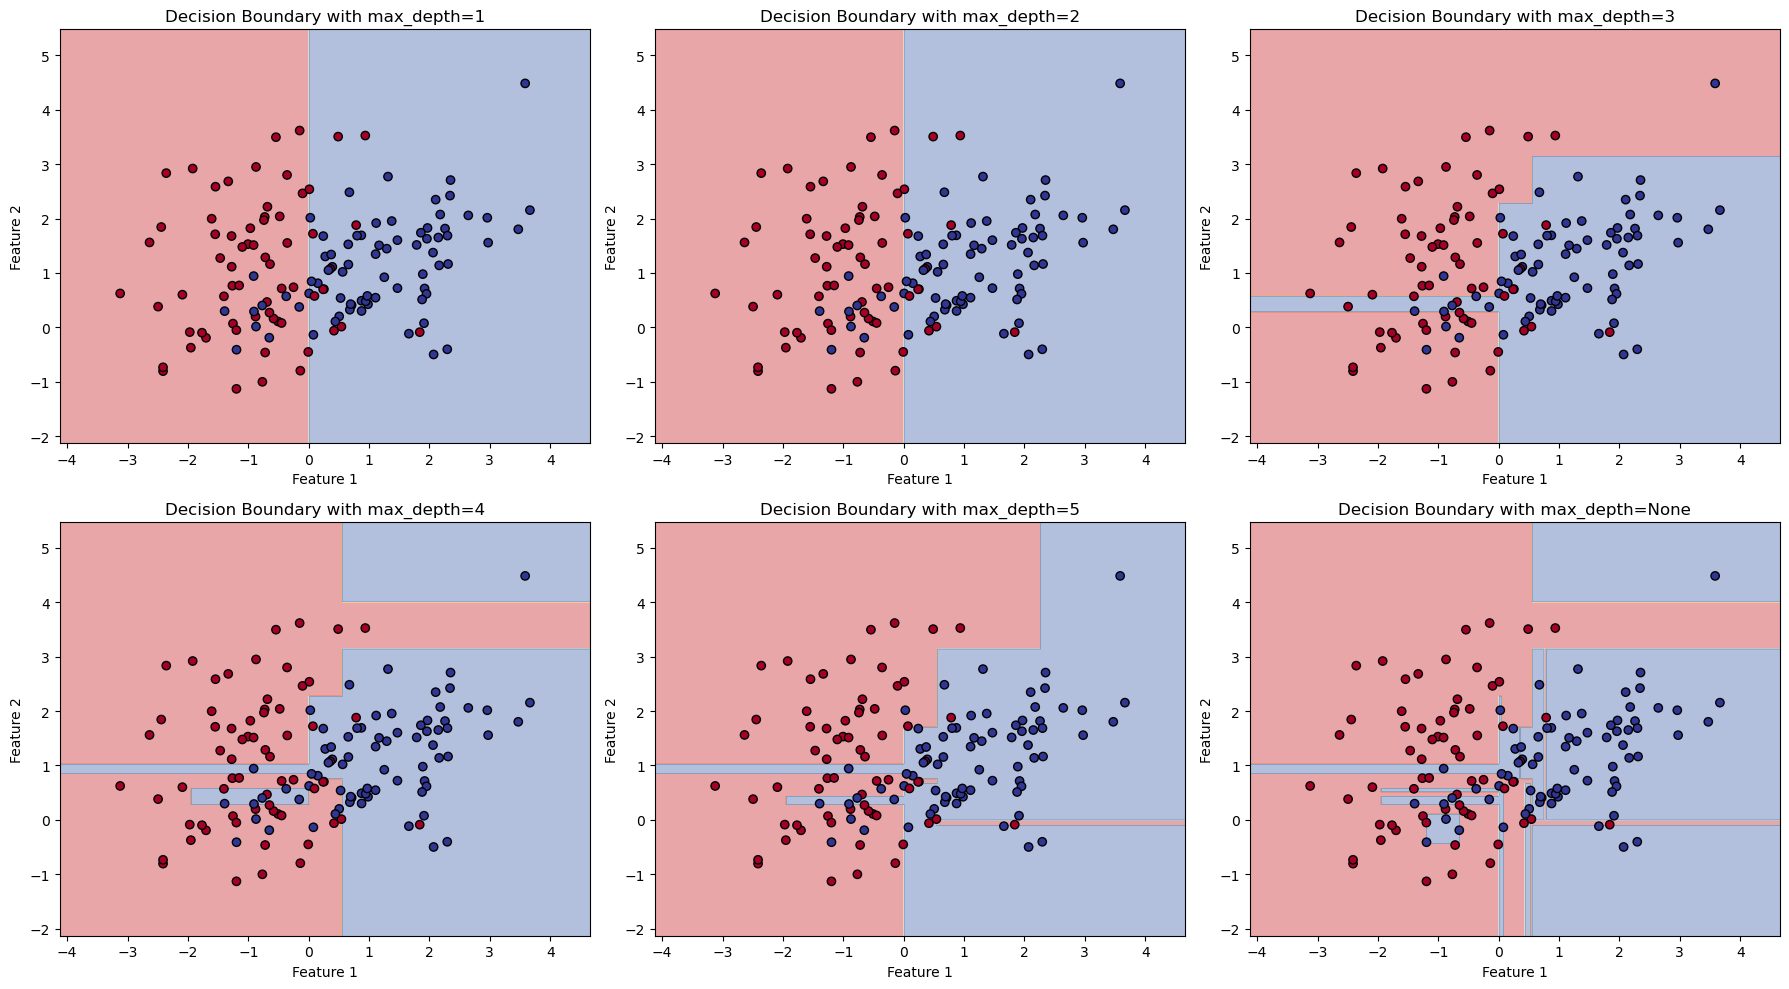

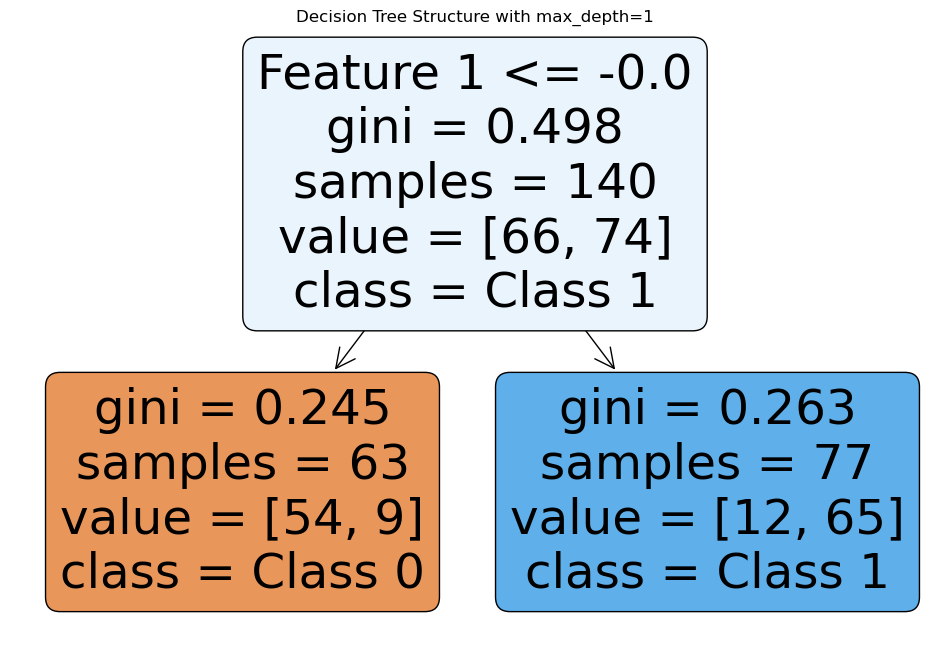

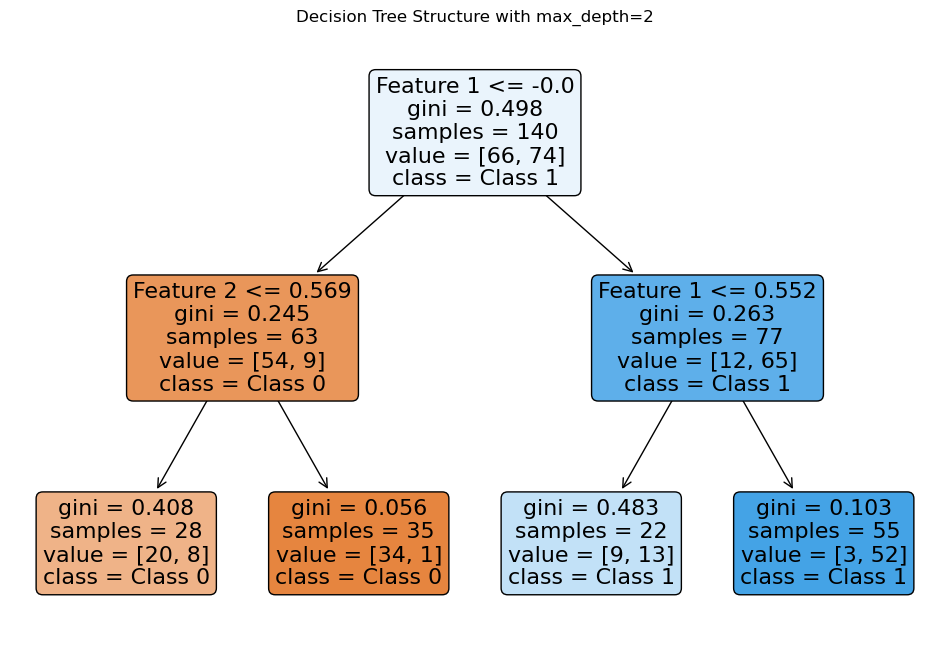

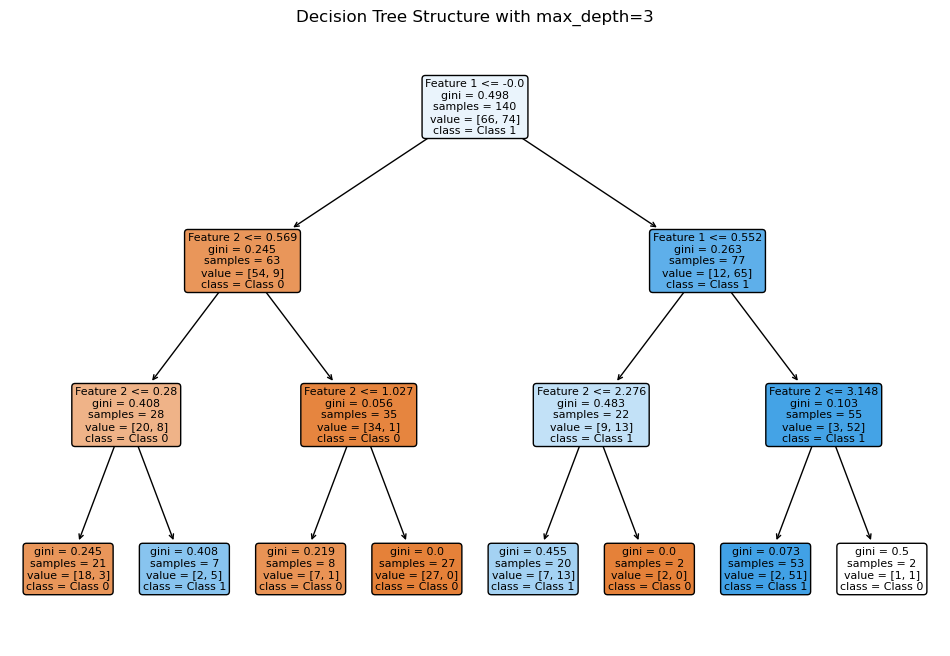

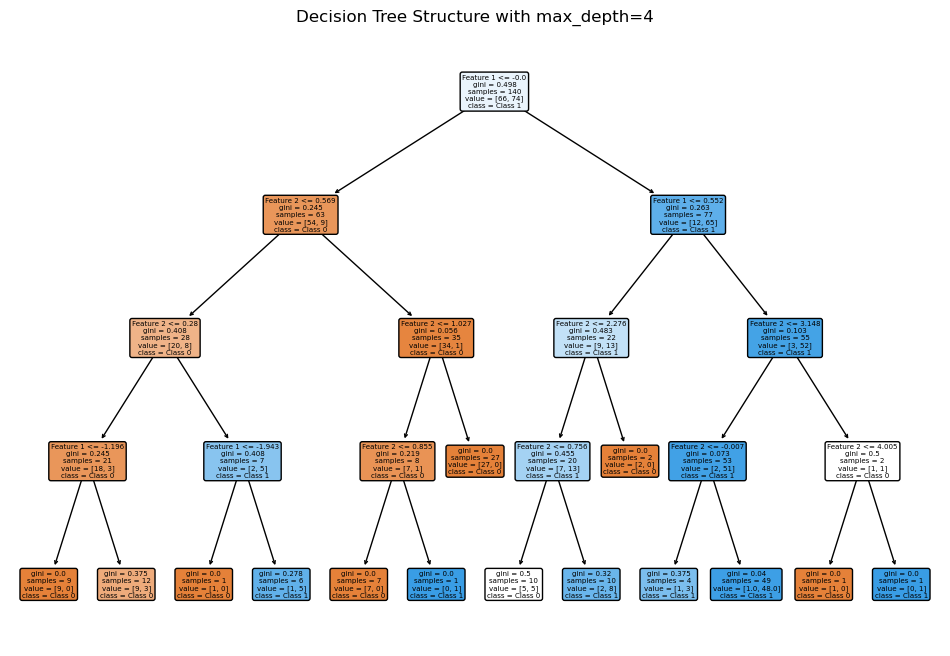

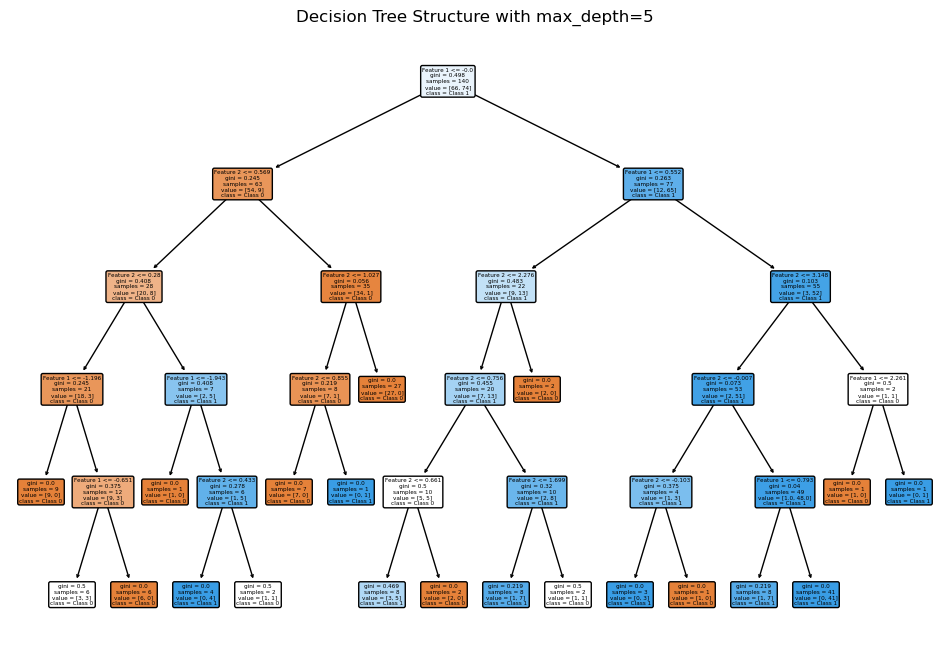

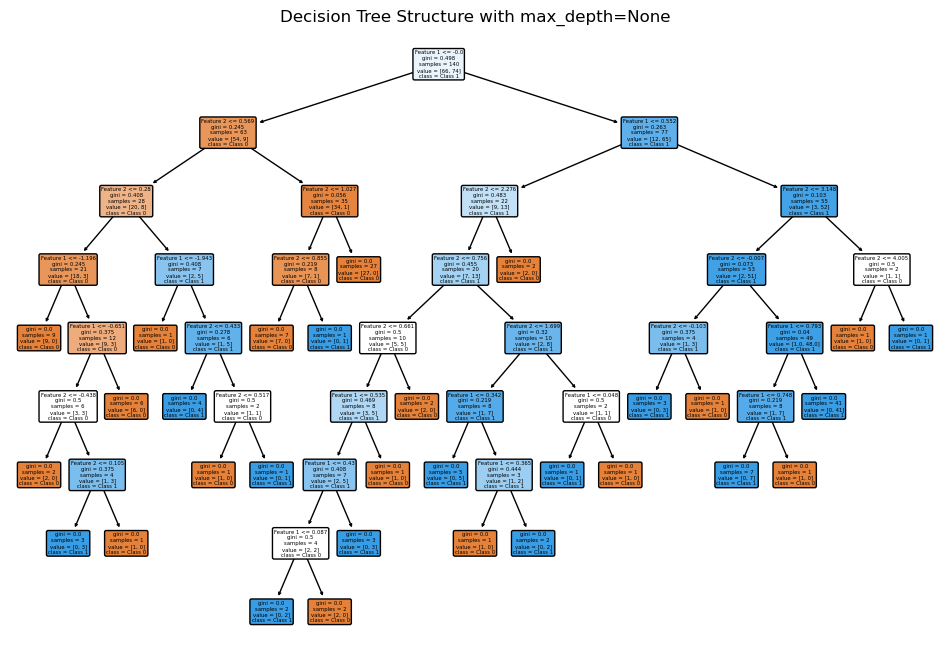

Accuracy with max_depth=1: 0.87
Accuracy with max_depth=2: 0.87
Accuracy with max_depth=3: 0.83
Accuracy with max_depth=4: 0.82
Accuracy with max_depth=5: 0.82
Accuracy with max_depth=None: 0.85


In [68]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to visualize decision boundaries for different max_depth values
def plot_decision_boundaries(max_depths, X_train, y_train):
    plt.figure(figsize=(18, 10))
    
    for i, depth in enumerate(max_depths):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        
        # Meshgrid for decision boundary
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict the values for the mesh grid
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Subplot for each depth
        plt.subplot(2, 3, i + 1)
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
        plt.title(f"Decision Boundary with max_depth={depth}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        
    plt.tight_layout()
    plt.show()

# Function to visualize tree structure for different max_depth values
def plot_tree_structure(max_depths, X_train, y_train):
    for depth in max_depths:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        
        # Plot tree structure
        plt.figure(figsize=(12, 8))
        plot_tree(clf, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"], rounded=True)
        plt.title(f"Decision Tree Structure with max_depth={depth}")
        plt.show()

# Plot decision boundaries for varying max_depth values
max_depths = [1, 2, 3, 4, 5, None]  # None means no limit on depth (could overfit)
plot_decision_boundaries(max_depths, X_train, y_train)

# Plot tree structure for varying max_depth values
plot_tree_structure(max_depths, X_train, y_train)

# Evaluate the performance with different max_depth values on the test set
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with max_depth={depth}: {accuracy:.2f}')


In [74]:
#Non linearly separable data

Accuracy with max_depth=1: 0.78


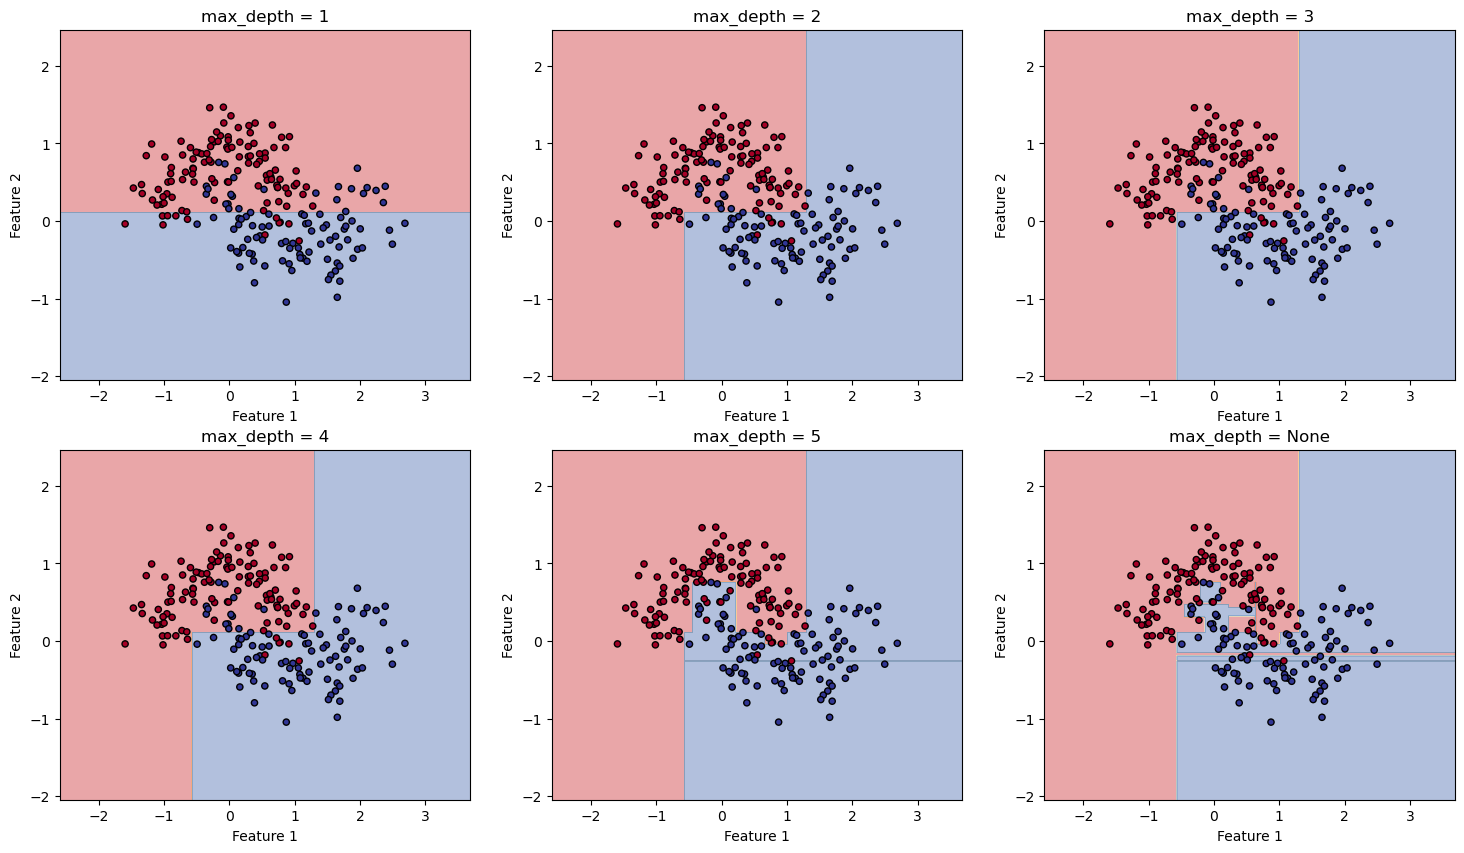

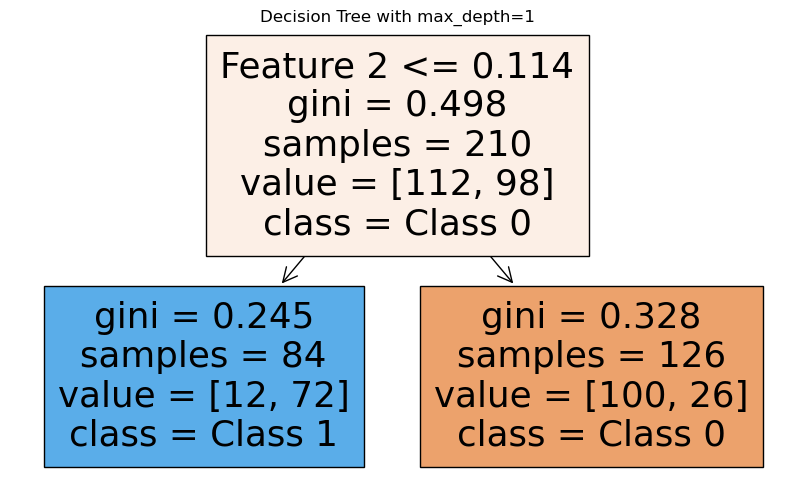

Accuracy with max_depth=2: 0.90


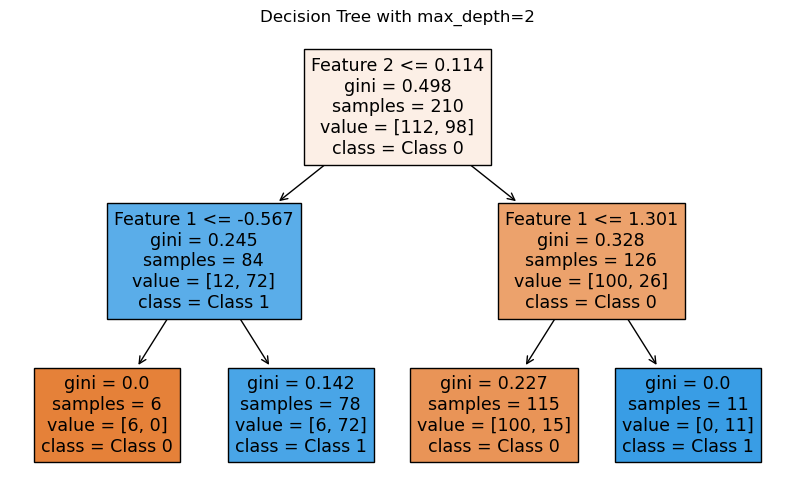

Accuracy with max_depth=3: 0.90


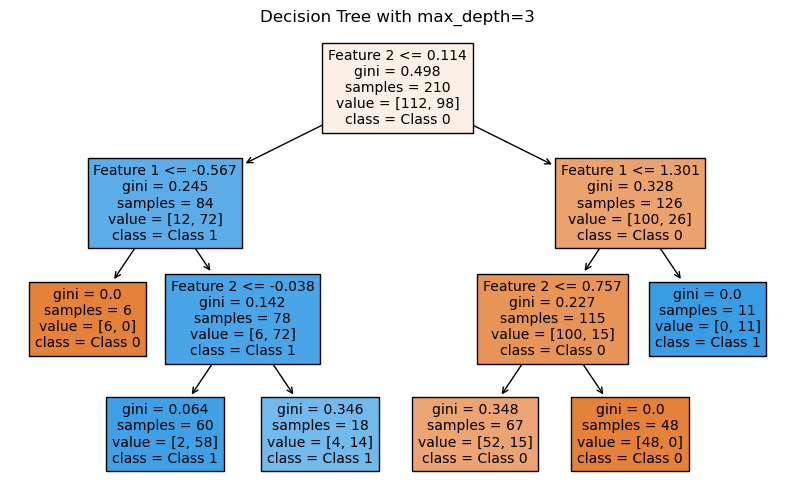

Accuracy with max_depth=4: 0.90


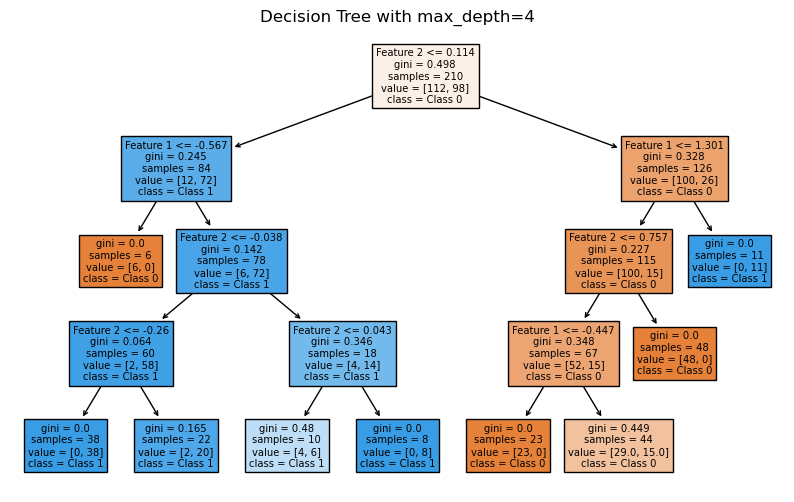

Accuracy with max_depth=5: 0.93


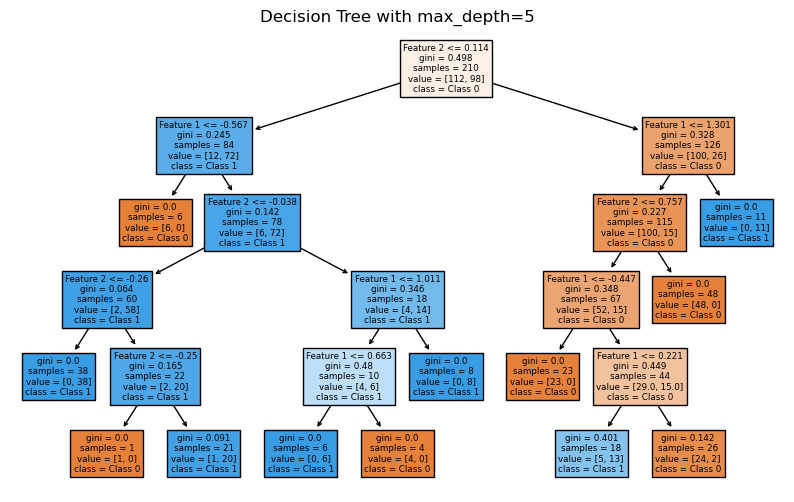

Accuracy with max_depth=None: 0.92


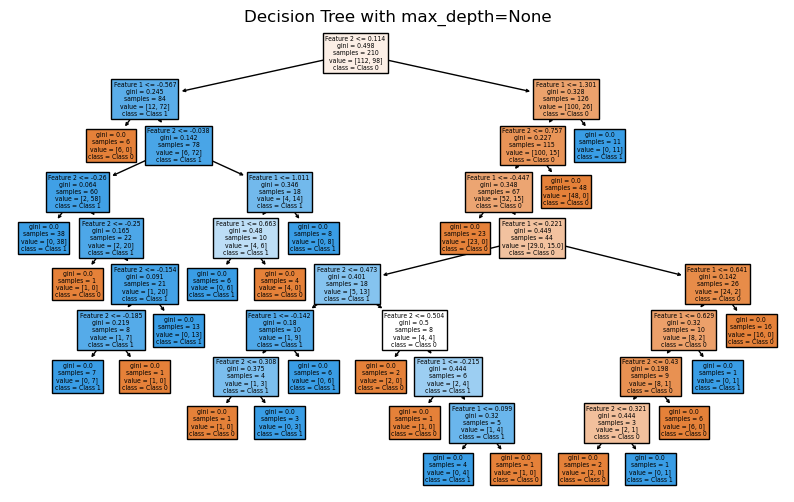

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Create non-linearly separable data using make_moons
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(max_depths, X_train, y_train):
    plt.figure(figsize=(18, 10))
    
    for i, max_depth in enumerate(max_depths):
        tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        tree_clf.fit(X_train, y_train)
        
        # Create meshgrid for decision boundary
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        
        Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.subplot(2, 3, i+1)
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
        plt.title(f"max_depth = {max_depth}")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

# Function to print tree structure and evaluate accuracy
def evaluate_and_plot_trees(max_depths, X_train, y_train, X_test, y_test):
    for max_depth in max_depths:
        tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        tree_clf.fit(X_train, y_train)

        # Accuracy on test set
        y_pred = tree_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy with max_depth={max_depth}: {accuracy:.2f}")

        # Plot the decision tree structure
        plt.figure(figsize=(10, 6))
        plot_tree(tree_clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
        plt.title(f"Decision Tree with max_depth={max_depth}")
        plt.show()

# Plot decision boundaries for varying max_depth values
max_depths = [1, 2, 3, 4, 5, None]  # None means no limit on depth (could overfit)
plot_decision_boundaries(max_depths, X_train, y_train)

# Evaluate the performance with different max_depth values on the test set
evaluate_and_plot_trees(max_depths, X_train, y_train, X_test, y_test)
